In [3]:
from audio import Audio

In [4]:
video_path="/Users/cse498/Documents/shortdemo1.mp4" 

In [5]:
audio = Audio()

In [6]:
audio_data,sr = audio.read(video_path)

In [7]:
sentiments_dict = audio.analyze_sentiments()

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/cse498/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/cse498/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:

In [20]:
clip_list = sentiments_dict['segments']


In [21]:
frontendlist= [(3, 10),(14,16),(34,38),(51,60),(100, 105),(200, 206)]

def included_clips(clip_list, frontendlist):
    included_clips = []
    for clip in clip_list:
        for i in frontendlist:
            if i[0] >= clip['start'] and i[0] < clip['end']:
                if clip not in included_clips:
                    included_clips.append(clip)
            elif i[1] > clip['start'] and i[1] <= clip['end']:
                if clip not in included_clips:
                    included_clips.append(clip)
    return included_clips
        

In [23]:
included_clips(clip_list, frontendlist)

[{'clip_id': 0,
  'start': 0,
  'end': 17,
  'text': " I'm going to talk to you about some things I've learned in my journey. Most from experience, some of my hurt and passing, many of them I'm still practicing, but all of them I do believe are true.",
  'sentiment_label': 'positive',
  'sentiment_score': 0.5316551923751831},
 {'clip_id': 2,
  'start': 34,
  'end': 51,
  'text': " So the question that we've got to ask ourselves is what success is to us, what success is to you? Is it more money? That's fine. I've got nothing against money. Maybe it's a healthy family. Maybe it's a happy marriage.",
  'sentiment_label': 'positive',
  'sentiment_score': 0.6398128271102905},
 {'clip_id': 3,
  'start': 51,
  'end': 68,
  'text': " it's maybe to help others to be famous, to be spiritually sound, to leave the world a little bit better place than you found me. Continue to ask yourself that question. Now your answer may change over time and that's fine, but do yourself this favor. Whatever you.

In [11]:
sentiments_dict['segments']

[{'clip_id': 0,
  'start': 0,
  'end': 17,
  'text': " I'm going to talk to you about some things I've learned in my journey. Most from experience, some of my hurt and passing, many of them I'm still practicing, but all of them I do believe are true.",
  'sentiment_label': 'positive',
  'sentiment_score': 0.5316551923751831},
 {'clip_id': 1,
  'start': 17,
  'end': 34,
  'text': " Life is not easy, it is not. Don't try to make it that way. Life's not fair, it never was, it isn't now, it won't ever be. Do not fall into the trap, the entitlement trap, a feeling like you're a victim. You are not. Get over it and get on with it.",
  'sentiment_label': 'negative',
  'sentiment_score': 0.9107863306999207},
 {'clip_id': 2,
  'start': 34,
  'end': 51,
  'text': " So the question that we've got to ask ourselves is what success is to us, what success is to you? Is it more money? That's fine. I've got nothing against money. Maybe it's a healthy family. Maybe it's a happy marriage.",
  'sentiment_

In [12]:
sentiments_dict

{'segments': [{'clip_id': 0,
   'start': 0,
   'end': 17,
   'text': " I'm going to talk to you about some things I've learned in my journey. Most from experience, some of my hurt and passing, many of them I'm still practicing, but all of them I do believe are true.",
   'sentiment_label': 'positive',
   'sentiment_score': 0.5316551923751831},
  {'clip_id': 1,
   'start': 17,
   'end': 34,
   'text': " Life is not easy, it is not. Don't try to make it that way. Life's not fair, it never was, it isn't now, it won't ever be. Do not fall into the trap, the entitlement trap, a feeling like you're a victim. You are not. Get over it and get on with it.",
   'sentiment_label': 'negative',
   'sentiment_score': 0.9107863306999207},
  {'clip_id': 2,
   'start': 34,
   'end': 51,
   'text': " So the question that we've got to ask ourselves is what success is to us, what success is to you? Is it more money? That's fine. I've got nothing against money. Maybe it's a healthy family. Maybe it's a hap

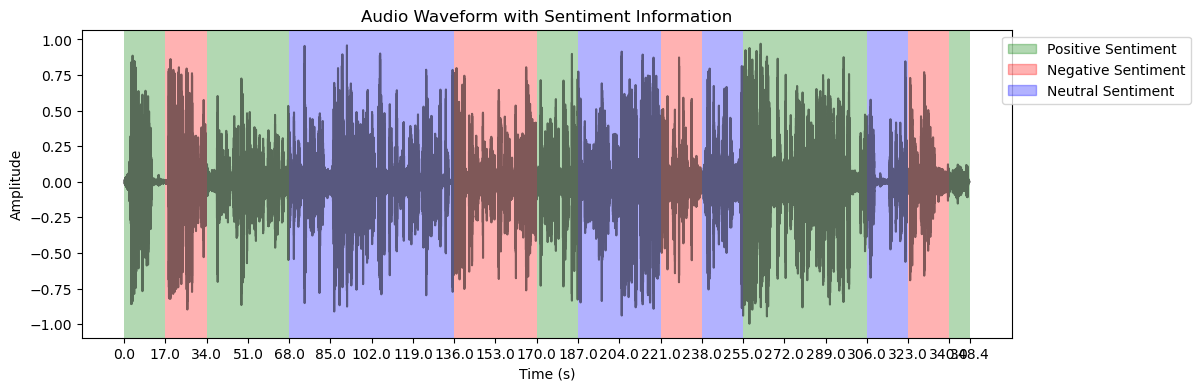

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

plt.figure(figsize=(12, 4))
time = np.arange(0, len(audio_data)) / sr
plt.plot(time, audio_data, color='black', alpha=0.5, label='Waveform')

# Plot sentiment information
for segment in sentiments_dict['segments']:
    start_time = segment['start']
    end_time = segment['end']
    label = segment['sentiment_label']

    # Set color based on sentiment label
    color = 'green' if label == 'positive' else 'red' if label == 'negative' else 'blue'

    # Draw a shaded region based on sentiment score
    plt.axvspan(start_time, end_time, facecolor=color, alpha=0.3)

# Set custom x-axis ticks with start and end times
x_ticks = [segment['start'] for segment in sentiments_dict['segments']] + [segment['end'] for segment in sentiments_dict['segments'][-1:]]
plt.xticks(x_ticks)

legend_handles = [
    Patch(color='green', alpha=0.3, label='Positive Sentiment'),
    Patch(color='red', alpha=0.3, label='Negative Sentiment'),
    Patch(color='blue', alpha=0.3, label='Neutral Sentiment'),
]

# Add a single legend for sentiment types with labels and colors
plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Adjust the figure properties
plt.title('Audio Waveform with Sentiment Information')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()